In [ ]:
Практична робота номер 4
МІТ-31, Голомозик Кирило

Завдання для бінарної класифікації (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC. Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Завдання для мультикласової класифікації (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини. Порівняйте результати різних класифікаторів.

Завдання для мультилейбл класифікації (Multilabel Classification):

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла. Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів. Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

In [ ]:
Бінарна класифікація:


Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718
ROC AUC Score: 0.891304347826087


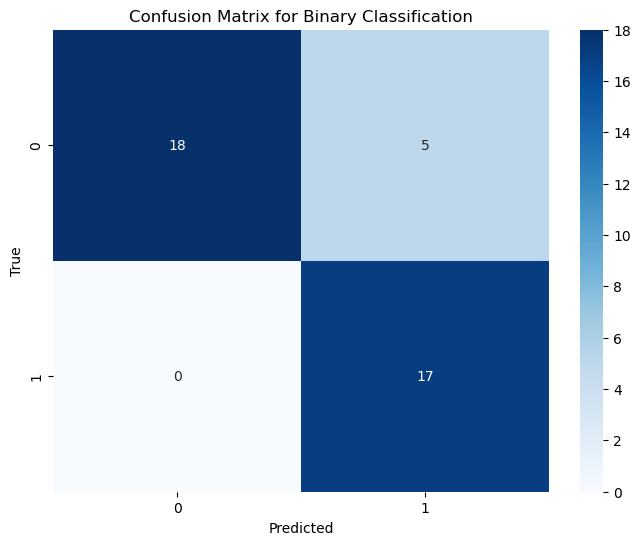

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier



# Завантаження даних
data_binary = pd.read_csv("classification_dataset.csv")

# Розділіть дані на ознаки (X) та цільову змінну (y)
X_binary = data_binary.drop("Target", axis=1)
y_binary = data_binary["Target"]

# Розділіть дані на навчальний та тестовий набори
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Оберіть та навчіть модель
model_binary = LogisticRegression()
model_binary.fit(X_train_binary, y_train_binary)

# Передбачення на тестовому наборі
y_pred_binary = model_binary.predict(X_test_binary)

# Оцініть ефективність
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
precision_binary = precision_score(y_test_binary, y_pred_binary)
recall_binary = recall_score(y_test_binary, y_pred_binary)
f1_binary = f1_score(y_test_binary, y_pred_binary)
roc_auc_binary = roc_auc_score(y_test_binary, y_pred_binary)

# Матриця плутанини
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Виведення результатів
print("Accuracy:", accuracy_binary)
print("Precision:", precision_binary)
print("Recall:", recall_binary)
print("F1 Score:", f1_binary)
print("ROC AUC Score:", roc_auc_binary)

# Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Binary Classification")
plt.show()


Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.75      0.38      0.50         8
           2       0.79      0.79      0.79        14
           3       0.77      0.91      0.83        11

    accuracy                           0.70        40
   macro avg       0.69      0.66      0.65        40
weighted avg       0.71      0.70      0.69        40



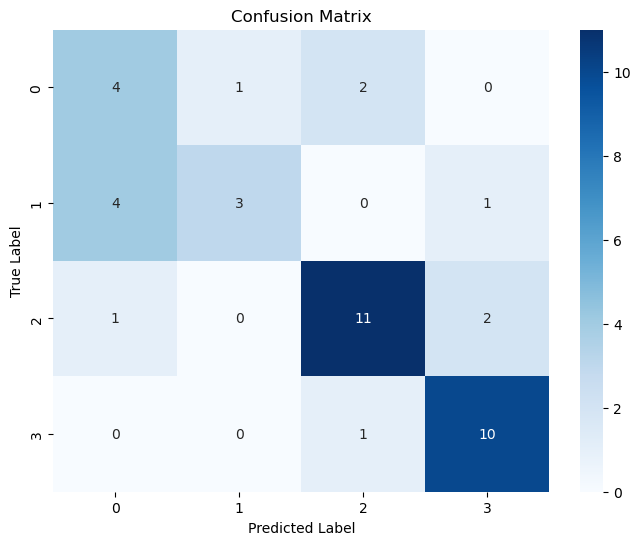

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
file_path = 'multiclass_dataset.csv'
df = pd.read_csv(file_path)

# Визначення ознак та цільової змінної
X = df.drop('Target', axis=1)
y = df['Target']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель класифікатора (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = clf.predict(X_test)

# Оцінка ефективності
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Вивід результатів
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Вивід матриці плутання за допомогою seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
Завдання №3 Завдання для мультилейбл класифікації (Multilabel Classification):

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.

In [4]:
data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Кількість дерев у класифікаторі
    'estimator__max_depth': [3, 4, 5],  # Глибина дерева
    'estimator__learning_rate': [0.01, 0.1, 0.2]  # Швидкість навчання
}

In [ ]:
Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.



In [6]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Задайте параметри, які ви хочете оптимізувати
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7],
    # Додайте інші параметри, які ви хочете оптимізувати
}

# створюємо модель, шукаємо кращі гіперпараметри та навчаємо
clf = MultiOutputClassifier(XGBClassifier())
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Виведення найкращих гіперпараметрів та результатів
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)

y_pred = best_estimator.predict(X_test)

# оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on test data: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Найкращі гіперпараметри: {'estimator__max_depth': 3, 'estimator__n_estimators': 50}

Accuracy on test data: 0.375
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.79      0.75      0.77        20
           2       0.84      0.76      0.80        21
           3       0.65      0.59      0.62        22

   micro avg       0.73      0.66      0.70        71
   macro avg       0.70      0.62      0.65        71
weighted avg       0.73      0.66      0.69        71
 samples avg       0.70      0.61      0.62        71



/Users/kirill/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirill/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


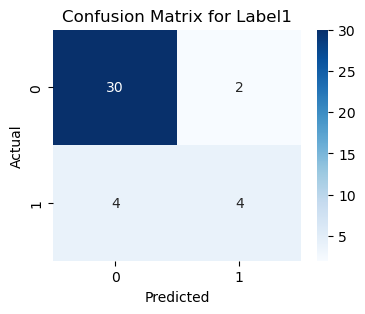

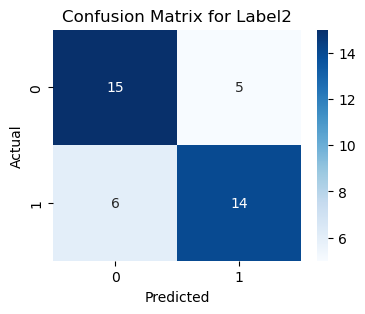

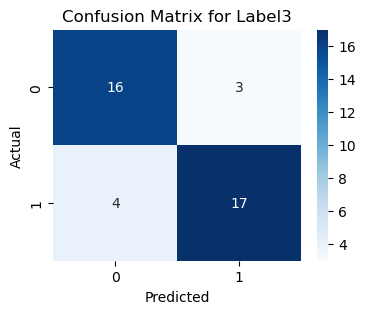

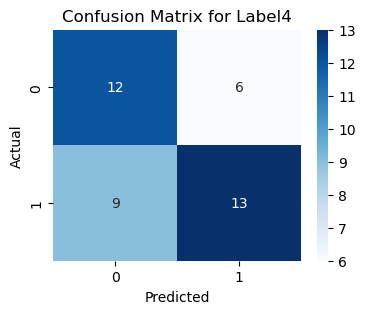

In [19]:
for i, label in enumerate(y.columns):
    cm = confusion_matrix(y_test[label], y_pred[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()